# Practice notebook
Please enter the necessary code in the cells below. Follow the instructions in the comment for each cell#, they tell you what the code should _do_ but not _how_ to do it. This is called **pseudocode**: Step-by-step instructions for what the code should do, leaving it up to you to write the executable code.

In [187]:
# Import pandas and seaborn with the abbreviations pd and sns
import pandas as pd
import seaborn as sns
# Seaborn display options
sns.set_theme()
sns.set_context('talk')

Try loading a single sheet from the workbook students.xlsx

In [188]:
# Load the students.xlsx spreadsheet from the data-subfolder (look on GitHub)
# When loading the dataframe:
#  Specify the header-row
#  Specify which sheet you're loading (there are three)

In [189]:
# display the first few rows of your dataframe

Now, load all of the sheets and use concat() to join them together so that you get all three years of test scores in one table. Here's a great, simple guide for how to [combine multiple Excel worksheets in a Pandas dataframe](https://pbpython.com/pandas-excel-tabs.html).

In [190]:
# Load all the sheets into one dataframe, using concat()
df = pd.concat(pd.read_excel(r'data\students.xlsx', header=1, sheet_name=None), ignore_index=True)

In [191]:
df

,Year,Student,Subject,Score
0,2020,Bart,English,D
1,2020,Bart,Maths,F
2,2020,Bart,Skateboarding,A
3,2020,Lisa,English,A
4,2020,Lisa,Maths,A
5,2020,Lisa,Skateboarding,D
6,2020,Milhouse,English,B
7,2020,Milhouse,Maths,C
8,2020,Milhouse,Skateboarding,F
9,2020,Sideshow Bob,English,D


In [192]:
df['Score'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [193]:
# The Score-row in the dataset contains letter-values. 
# Use replace() to convert the letter-values into numeric values.
# Hint: replace() allows you to use a dictionary to replace systematically (e.g, {'A':5, 'B':4, etc.})
df['Score'].replace({'A':4, 'B':3, 'C':2, 'D':1, 'F':0}, inplace=True)

In [194]:
df.head()

,Year,Student,Subject,Score
0,2020,Bart,English,1
1,2020,Bart,Maths,0
2,2020,Bart,Skateboarding,4
3,2020,Lisa,English,4
4,2020,Lisa,Maths,4


# Reshape long to wide
Use `pd.pivot()` to reshape a dataframe from long to wide.

## Example 1: Separate columns by subject


In [195]:
# Declare a separate dataframe. Use pivot_table() 
# to spread the Subject-column into separate columns, and calculate the average for each subject
df_wide = pd.pivot(df, index=['Student', 'Year '], columns=['Subject'], values='Score').reset_index()

In [196]:
df_wide

Subject,Student,Year,English,Maths,Skateboarding
0,Bart,2020,1,0,4
1,Bart,2021,3,1,3
2,Bart,2022,4,3,2
3,Lisa,2020,4,4,1
4,Lisa,2021,3,3,2
5,Lisa,2022,4,4,3
6,Milhouse,2020,3,2,0
7,Milhouse,2021,4,3,1
8,Milhouse,2022,4,2,3
9,Sideshow Bob,2020,1,4,3


In [197]:
subject_list = ['English', 'Maths', 'Skateboarding']
for s in subject_list:
    mean_s = df_wide[s].mean()
    print(f'Average for {s} is: {mean_s}')

Average for English is: 3.25
Average for Maths is: 2.6666666666666665
Average for Skateboarding is: 2.1666666666666665


## Example 2: Columns by year

In [198]:
# Declare a new dataframe. Spread the Year-column into separate columns.
# Sort the dataframe by student name and subject, using sort_values()
df_wide2 = pd.pivot(df, index=['Student', 'Subject'], columns='Year ', values='Score').reset_index().sort_values(by=['Student', 'Subject'])

In [199]:
df_wide2

Year,Student,Subject,2020,2021,2022
0,Bart,English,1,3,4
1,Bart,Maths,0,1,3
2,Bart,Skateboarding,4,3,2
3,Lisa,English,4,3,4
4,Lisa,Maths,4,3,4
5,Lisa,Skateboarding,1,2,3
6,Milhouse,English,3,4,4
7,Milhouse,Maths,2,3,2
8,Milhouse,Skateboarding,0,1,3
9,Sideshow Bob,English,1,4,4


# Reshape wide to long
Use `pd.melt()` to bring multiple columns (the year-columns in this case) into one, transforming the table from wide to long.

In [200]:
df_wide2.keys()

Index(['Student', 'Subject', 2020, 2021, 2022], dtype='object', name='Year ')

In [201]:
df2_long = pd.melt(df_wide2, id_vars=['Student', 'Subject'], value_vars=[2020, 2021, 2022])

In [202]:
df2_long

,Student,Subject,Year,value
0,Bart,English,2020,1
1,Bart,Maths,2020,0
2,Bart,Skateboarding,2020,4
3,Lisa,English,2020,4
4,Lisa,Maths,2020,4
5,Lisa,Skateboarding,2020,1
6,Milhouse,English,2020,3
7,Milhouse,Maths,2020,2
8,Milhouse,Skateboarding,2020,0
9,Sideshow Bob,English,2020,1


# Visualisations
For visualising categorical data (e.g., by year, subject, student) see this [Seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html)

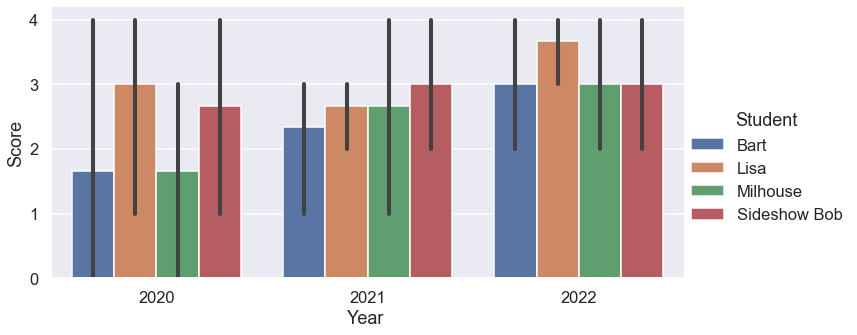

In [203]:
# Use sns.catplot() to visualise scores by student and/or by year
sns.catplot(data=df, x='Year ', y='Score', hue='Student', kind='bar', aspect=2)

In [204]:
df2_long.keys()

Index(['Student', 'Subject', 'Year ', 'value'], dtype='object')

In [205]:
df2_long.head()

,Student,Subject,Year,value
0,Bart,English,2020,1
1,Bart,Maths,2020,0
2,Bart,Skateboarding,2020,4
3,Lisa,English,2020,4
4,Lisa,Maths,2020,4


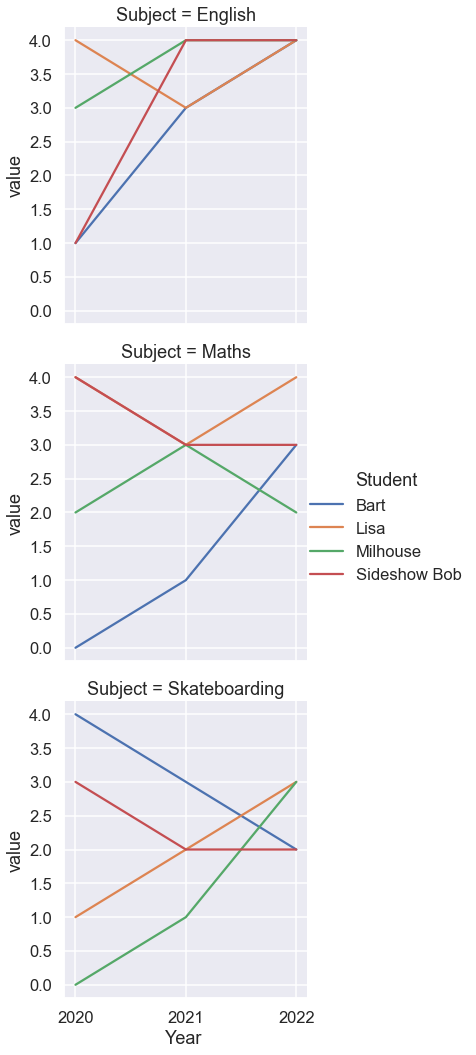

In [206]:
# Line graph from the df2_long
sns.relplot(data=df2_long, kind='line', x='Year ', y='value', hue='Student', row='Subject')

Turn this into a **slopegraph** by filtering out the middle year

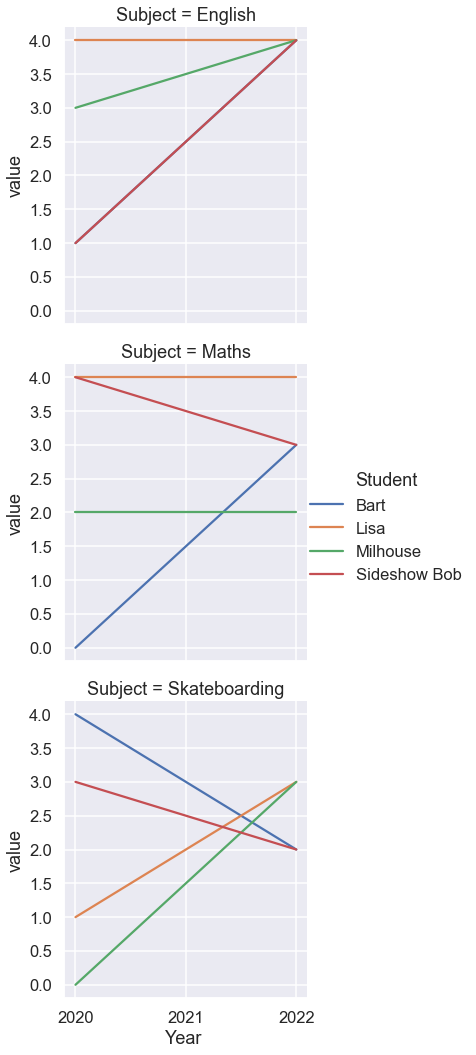

In [210]:
# Select only 2020 and 2022 results
df2_long = df2_long[(df2_long['Year ']==2020) | (df2_long['Year ']==2022)] # include 2020 or 2022
# Repeat the line graph code above
sns.relplot(data=df2_long, kind='line', x='Year ', y='value', hue='Student', row='Subject')